In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Memasukan Dataset

In [6]:
df = pd.read_csv('Flipkart_Mobiles.csv',encoding='latin1')
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [8]:
# melihat jumlah baris dan kolom
df.shape

(3114, 8)

In [2]:
df.tail()

NameError: name 'df' is not defined

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


In [10]:
df['Memory'] = df['Memory'].str.replace('GB','')

In [32]:
df['Storage'] = df['Storage'].str.replace('GB','')

In [40]:
df['Storage'] = df['Storage'].str.replace('1 TB','1000')

In [38]:
df['Storage'] = df['Storage'].str.replace('Expandable Upto','')

In [22]:
df['Memory'] = df['Memory'].str.replace('1.5','2')

C:\Users\agungadty\AppData\Local\Temp\ipykernel_5312\1815835806.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Memory'] = df['Memory'].str.replace('1.5','2')


In [23]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4,64 GB,4.5,11990,15990


In [71]:
df.loc[df['Original Price'] == '.']

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price


In [13]:
df.drop_duplicates(keep=False,inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

Brand               0
Model               0
Color               0
Memory             37
Storage            39
Rating            125
Selling Price       0
Original Price      0
dtype: int64

In [16]:
df.dropna(axis=0,inplace=True)

In [17]:
df.isnull().sum()

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64

In [74]:
df.dtypes

Brand              object
Model              object
Color              object
Memory              int32
Storage             int32
Rating            float32
Original Price      int64
dtype: object

In [19]:
df = df[df.Memory != 1.5]

In [86]:
df = df[df.Memory != 64]

In [50]:
df = df[df.Storage != 10]

In [58]:
df = df[df['Brand'] != 'Nokia']

In [47]:
df['Rating'] = df['Rating'].astype('float32')

In [26]:
df['Memory'] = df['Memory'].astype('int32')

In [41]:
df['Storage'] = df['Storage'].astype('int')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2716 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           2716 non-null   object 
 1   Model           2716 non-null   object 
 2   Color           2716 non-null   object 
 3   Memory          2716 non-null   int32  
 4   Storage         2716 non-null   object 
 5   Rating          2716 non-null   float32
 6   Selling Price   2716 non-null   int64  
 7   Original Price  2716 non-null   int64  
dtypes: float32(1), int32(1), int64(2), object(4)
memory usage: 169.8+ KB


In [87]:
df.describe()

,Memory,Storage,Rating,Original Price
count,2464.000000,2464.000000,2464.000000,2464.000000
mean,4.372159,87.642857,4.251380,26570.172484
std,2.347045,92.116023,0.258918,27518.541170
min,1.000000,2.000000,2.300000,1099.000000
25%,3.000000,32.000000,4.100000,10999.000000
50%,4.000000,64.000000,4.300000,16990.000000
75%,6.000000,128.000000,4.400000,29899.250000
max,16.000000,1000.000000,5.000000,189999.000000


### EDA (Exploratory Data Analysis)

C:\Users\agungadty\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


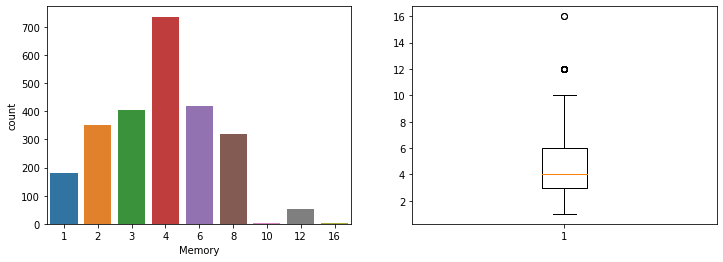

In [88]:
#Menganalisis memory (RAM)

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['Memory'])
f.add_subplot(1,2,2)
plt.boxplot(df['Memory'])
plt.show()

C:\Users\agungadty\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


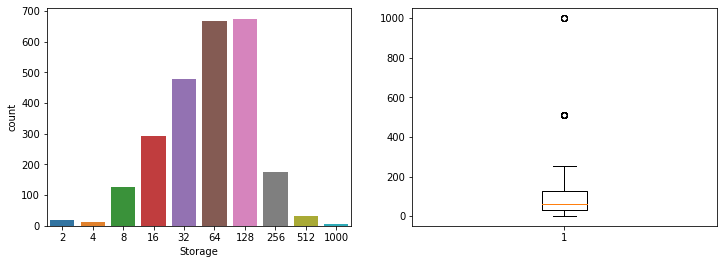

In [65]:
#Menganalisis storage

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['Storage'])
f.add_subplot(1,2,2)
plt.boxplot(df['Storage'])
plt.show()

C:\Users\agungadty\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


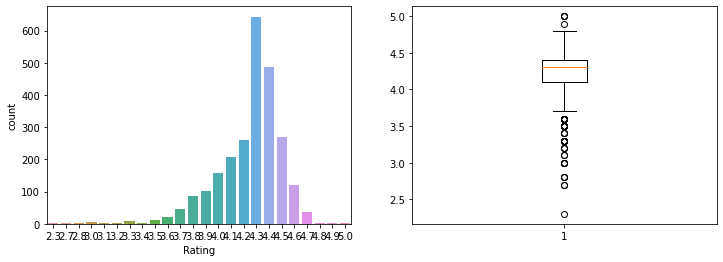

In [66]:
#Menganalisis rating

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['Rating'])
f.add_subplot(1,2,2)
plt.boxplot(df['Rating'])
plt.show()

C:\Users\agungadty\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

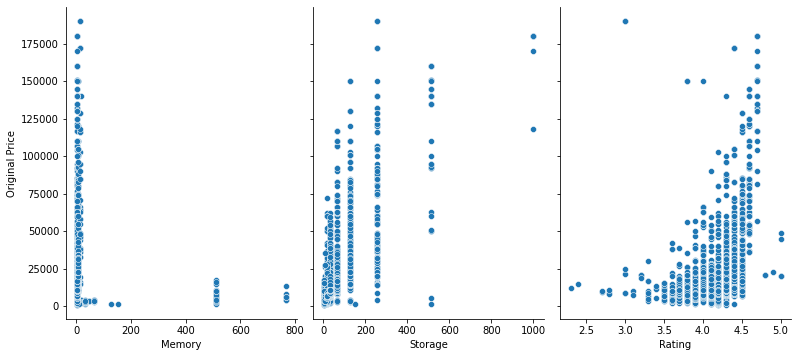

In [54]:
#Menganalisis antara independent variable dan dependent variable

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Memory', 'Storage', 'Rating'], y_vars=['Original Price'], size=5, aspect=0.75)

In [80]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable

df.corr().style.background_gradient().set_precision(2)

C:\Users\agungadty\AppData\Local\Temp\ipykernel_5312\282295218.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,Memory,Storage,Rating,Original Price
Memory,1.00,0.30,0.14,0.14
Storage,0.30,1.00,0.42,0.68
Rating,0.14,0.42,1.00,0.40
Original Price,0.14,0.68,0.40,1.00


In [73]:
del df['Selling Price']

In [75]:
del df['Brand']

In [76]:
del df['Color']

In [77]:
del df['Model']

### Modeling Data

In [78]:
#Membuat variable
x = df.drop(columns='Original Price')
y = df['Original Price']

#split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

#membuay object linear regresi.
lin_reg = LinearRegression()

#train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)

#mencari tau nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ -523.63633755   194.28092691 15293.28763271]
-53151.98590137016


In [79]:
lin_reg.score(x_test, y_test)

0.5857981712404858

### Test prediksi harga ponsel

In [81]:
lin_reg.predict([[4,64,4.5]])

C:\Users\agungadty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26007.24241793])

## Selesai

<AxesSubplot:>

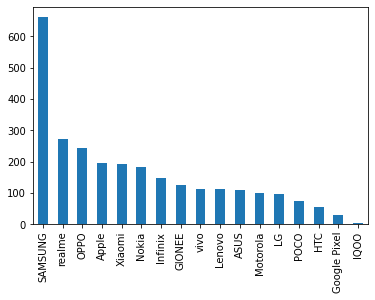

In [104]:
# menganalisis brand ponsel
df['Brand'].value_counts().plot(kind='bar')

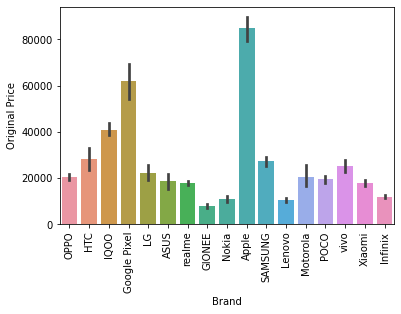

In [105]:
# menganalisis harga rata-rata dari setiap brand
sns.barplot(x=df['Brand'],y=df['Original Price'])
plt.xticks(rotation='vertical')
plt.show()

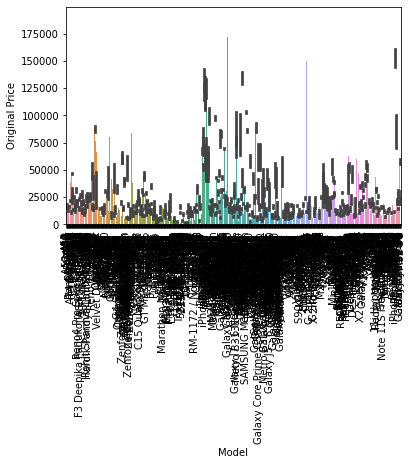

In [107]:
# melihat nilai rata-rata dari setiap type ponsel
sns.barplot(x=df['Model'],y=df['Original Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\agungadty\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

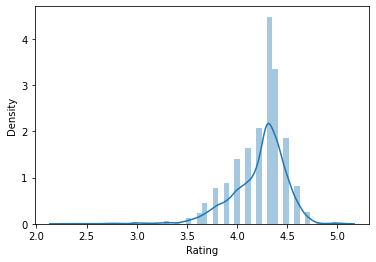

In [112]:
# menganalisis berdasarkan rating
sns.distplot(df['Rating'])

<AxesSubplot:xlabel='Rating', ylabel='Original Price'>

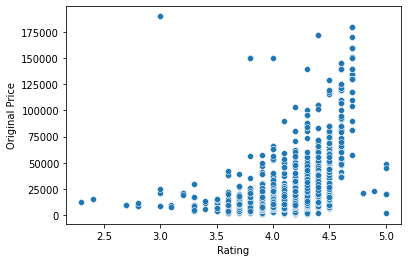

In [113]:
# menganalisis harga ponsel berdasarkan rating
sns.scatterplot(x=df['Rating'],y=df['Original Price'])

In [114]:
df.sample(5)

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
2826,vivo,Y69,Matte Black,3,32 GB,4.3,13990,13990
1767,SAMSUNG,Galaxy A20s,Blue,3,32 GB,4.3,11599,12900
2819,vivo,V11 Pro,Dazzling Gold,6,64 GB,4.5,25990,25990
2421,POCO,C3,Matte Black,4,64 GB,4.3,8999,10999
1841,SAMSUNG,Galaxy Note 5,black sapphire,4,32 GB,3.9,46900,46900


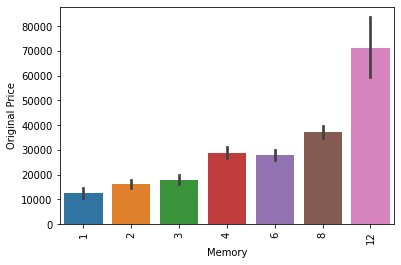

In [130]:
sns.barplot(x=df['Memory'],y=df['Original Price'])
plt.xticks(rotation='vertical')
plt.show()

In [120]:
df = df[df.Memory != 30]

In [121]:
df = df[df.Memory != 32]

In [122]:
df = df[df.Memory != 46]

In [123]:
df = df[df.Memory != 64]

In [125]:
df = df[df.Memory != 100]

In [126]:
df = df[df.Memory != 128]

In [127]:
df = df[df.Memory != 153]

In [128]:
df = df[df.Memory != 512]

In [129]:
df = df[df.Memory != 768]

In [131]:
# korelasi dengan harga
df.corr()['Original Price']

Memory            0.333705
Rating            0.409462
Selling Price     0.979949
Original Price    1.000000
Name: Original Price, dtype: float64

In [132]:
df.sample(6)

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
1517,SAMSUNG,Galaxy M31,Space Black,6,64 GB,4.3,16299,16299
2663,HTC,Desire 326G DS,White Birch,1,8 GB,3.7,9590,9590
2915,Infinix,Note 7,Forest Green,4,64 GB,4.3,14999,14999
1577,SAMSUNG,Galaxy Note 20,Mystic Bronze,8,256 GB,4.3,77999,86000
2072,SAMSUNG,Galaxy A6,Black,4,32 GB,4.3,12499,22990
789,GIONEE,S11 Lite,Dark Blue,4,32 GB,4.0,8750,8750


<AxesSubplot:>

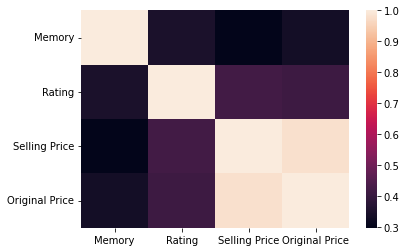

In [134]:
sns.heatmap(df.corr())

C:\Users\agungadty\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Original Price', ylabel='Density'>

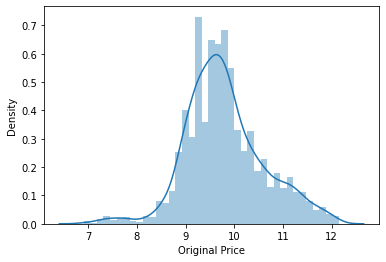

In [135]:
sns.distplot(np.log(df['Original Price']))

### Spliting data menjadi data test dan data training

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

ModuleNotFoundError: No module named 'sklearn'

In [1]:
df.discribe()

NameError: name 'df' is not defined